In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(ggpubr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [3]:
data<-read_csv("data/lab.csv",skip=1)
data<-data|>mutate(Time=as.factor(Time))|>
mutate(temp=as.factor(temp))|>
mutate(embryos_percent=embryos_percent*100)

print(data)

Rows: 38 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Lab_section, Max_developmental_stage_reached, Any_notable_features,...
dbl (5): Time, temp, embyos, embryos_percent, stage

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 38 × 9
   Lab_section Time  temp  embyos embryos_percent Max_de…¹ Any_n…² Survi…³ stage
   <chr>       <fct> <fct>  <dbl>           <dbl> <chr>    <chr>   <chr>   <dbl>
 1 L02         24    18         5           0.838 11to11.5 yolk p… Y        11.2
 2 L03         24    18        21           3.52  12to12.5 late g… Y        12.2
 3 L02         24    23         6           1.07  19to20   clear … Y        19.5
 4 L03         24    23        11           1.96  19to20   end of… Y        19.5
 5 L02         48    18         5           0.838 22to24   clear … Y        23  
 6 L03         48    18         2           0.335 18to19   NA      Y        18.5
 7 L03         48    18        16           2.68  22to24   visibl… Y        23  
 8 L03         48    18         2           0.335 24       NA      Y        24  
 9 L02         48    23         6           1.07  33to34   NA      Y        33.5
10 L03         48    23        11           1.96  33to35   NA      Y        34  
# … with 

In [4]:
dff<-data.frame(
    "Time"=c(24,24,48,48,72,72),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24, 19.5/24, 
             (22.72-12.05769)/24,(33.82353-19.5)/24, 
             (33.5-22.72)/24, (42-33.82353)/24)
    )
dff

Time,temp,rate
<dbl>,<chr>,<dbl>
24,18,0.5024037
24,23,0.8125000
48,18,0.4442629
48,23,0.5968137
72,18,0.4491667
72,23,0.3406863


In [5]:
abc<-data.frame(
    "temp"=c(rep(18,46),rep(23,40)),
    "time"=c(rep(24,26),rep(48,15),rep(72,5),rep(24,17),rep(48,17),rep(72,6)),
    "stage"=c(rep(11.25,5),rep(12.25,21),rep(23,5),rep(18.5,2),rep(23,6),rep(24,2),rep(33.5,5),
              rep(19.5,17),rep(33.5,6),rep(34,11),rep(42,6)) )
abc<-abc|>mutate(temp=as.factor(temp))
abc

temp,time,stage
<fct>,<dbl>,<dbl>
18,24,11.25
18,24,11.25
18,24,11.25
⋮,⋮,⋮
23,72,42
23,72,42
23,72,42


In [6]:
abclm<-data.frame(
    "temp"=c(18,rep(18,46),23,rep(23,40)),
    "time"=c(0,rep(24,26),rep(48,15),rep(72,5),0,rep(24,17),rep(48,17),rep(72,6)),
    "stage"=c(0,rep(11.25,5),rep(12.25,21),rep(23,5),rep(18.5,2),rep(23,6),rep(24,2),rep(33.5,5),
              0,rep(19.5,17),rep(33.5,6),rep(34,11),rep(42,6)) )
abclm<-abclm|>mutate(temp=as.factor(temp))
abclm

temp,time,stage
<fct>,<dbl>,<dbl>
18,0,0.00
18,24,11.25
18,24,11.25
⋮,⋮,⋮
23,72,42
23,72,42
23,72,42


Warning message:
“Removed 26 rows containing missing values (`position_stack()`).”


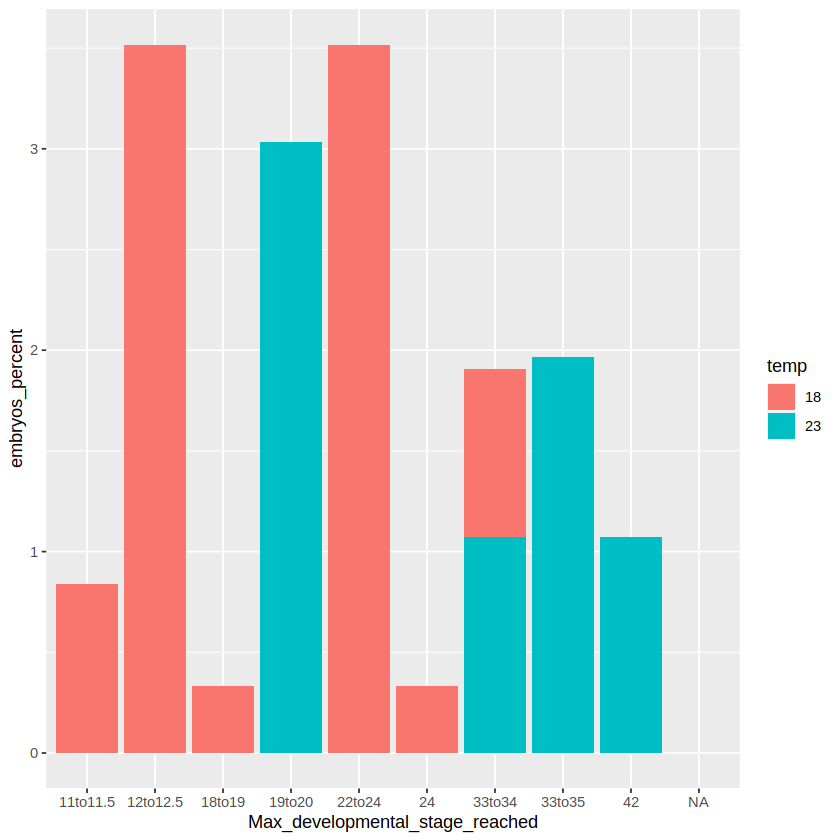

In [7]:
ggplot(data,aes(x=Max_developmental_stage_reached,y=embryos_percent, fill=temp))+
geom_bar(stat="identity")

Warning message:
“Removed 26 rows containing missing values (`position_stack()`).”


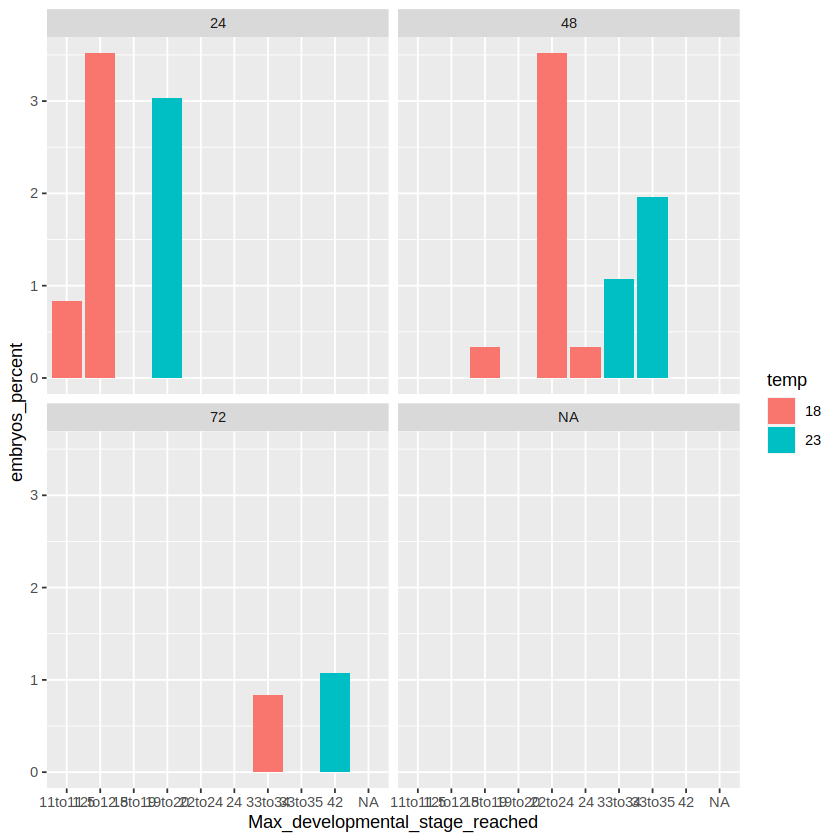

In [8]:
ggplot(data,aes(x=Max_developmental_stage_reached,y=embryos_percent, fill=temp))+
geom_bar(stat="identity")+
facet_wrap(~Time)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (`stat_bin()`).”


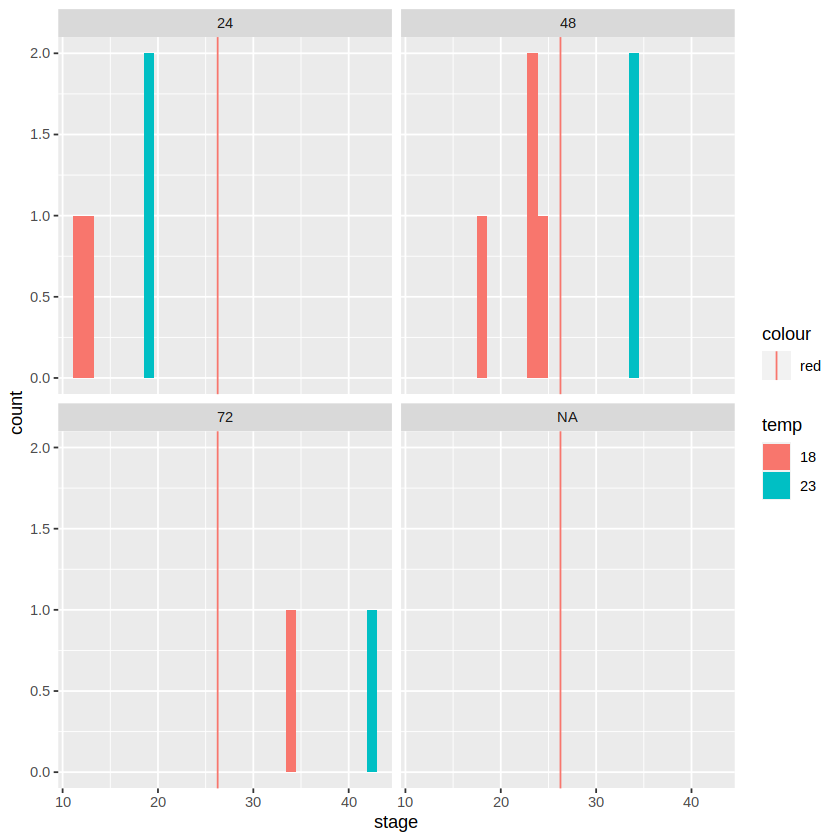

In [9]:
ggplot(data, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=26.26, color="red"))+

#geom_vline(aes(xintercept=14, color=temp))+
#geom_vline(aes(xintercept=14, color=temp))+
#geom_vline(aes(xintercept=14, color=temp))+
facet_wrap(~Time)


In [10]:
everagedata<-data|>group_by(Time, temp)|>summarize(avegare=mean(embryos_percent))
print(everagedata)

`summarise()` has grouped output by 'Time'. You can override using the
`.groups` argument.


# A tibble: 7 × 3
# Groups:   Time [4]
  Time  temp  avegare
  <fct> <fct>   <dbl>
1 24    18      2.18 
2 24    23      1.52 
3 48    18      1.05 
4 48    23      1.52 
5 72    18      0.838
6 72    23      1.07 
7 NA    NA     NA    


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 26 rows containing non-finite values (`stat_bin()`).”


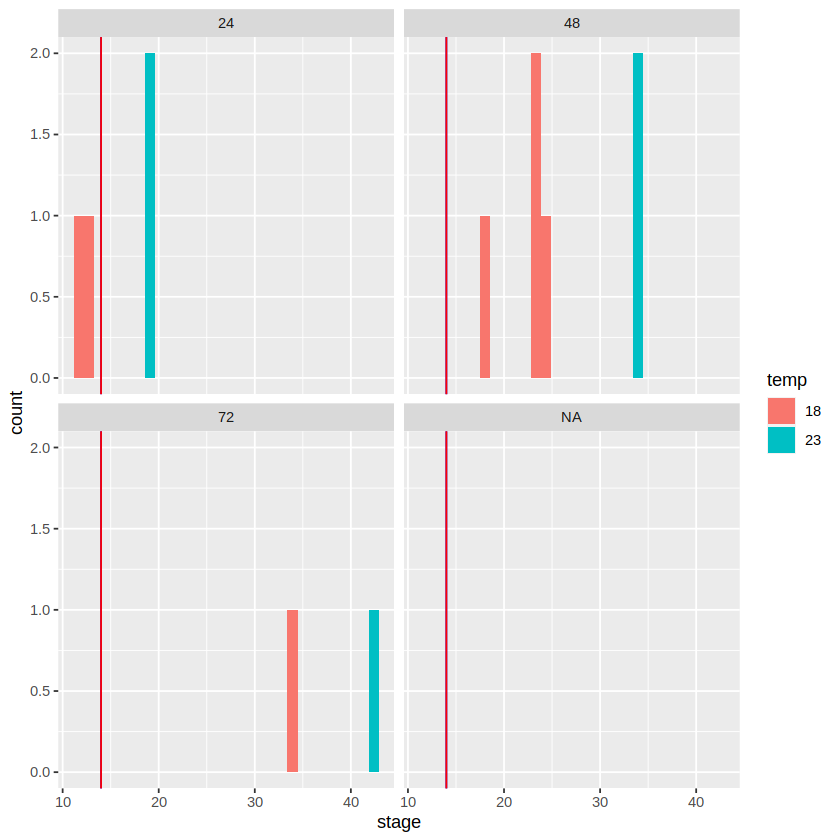

In [11]:
ggplot(data, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=14),color='blue')+
geom_vline(aes(xintercept=14), color='red')+
facet_wrap(~Time)

# 24 h

In [12]:
mean18<-(5*11.25+21*12.25)/26
mean23<-19.5
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 12.05769
[1] "mean 23"
[1] 19.5


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


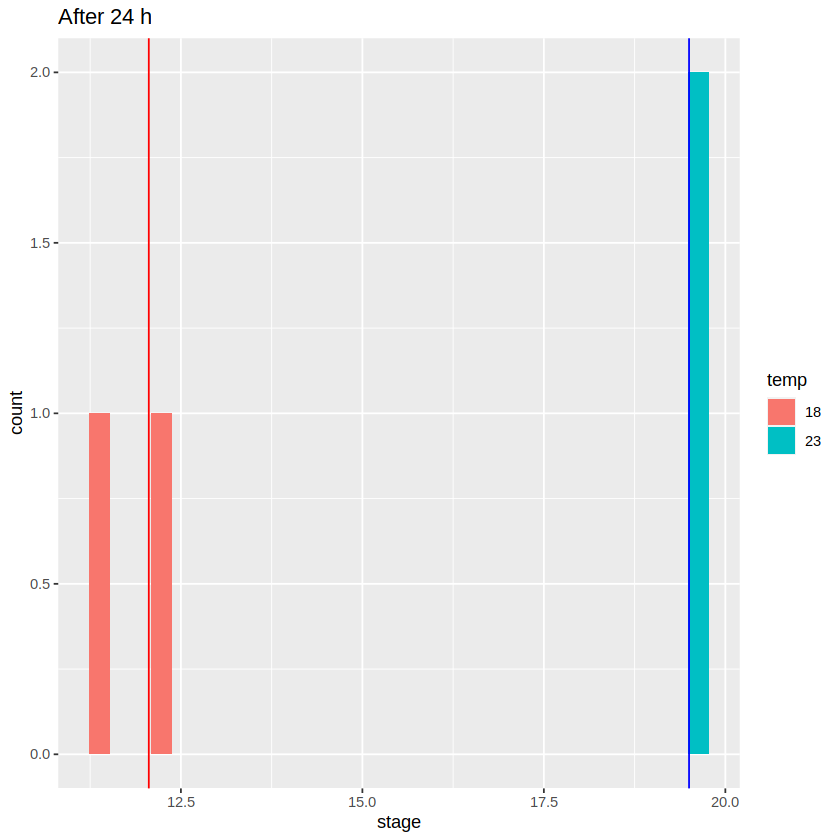

In [13]:
data24<-data|>filter(Time=='24')
ggplot(data24, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=12.05769),color='red')+
geom_vline(aes(xintercept=19.5), color='blue')+
ggtitle("After 24 h")



# 48 h

In [14]:
mean18<-(5*23+2*18.5+16*23+2*24)/(25)
mean23<-(6*33.5+11*34)/17
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 22.72
[1] "mean 23"
[1] 33.82353


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


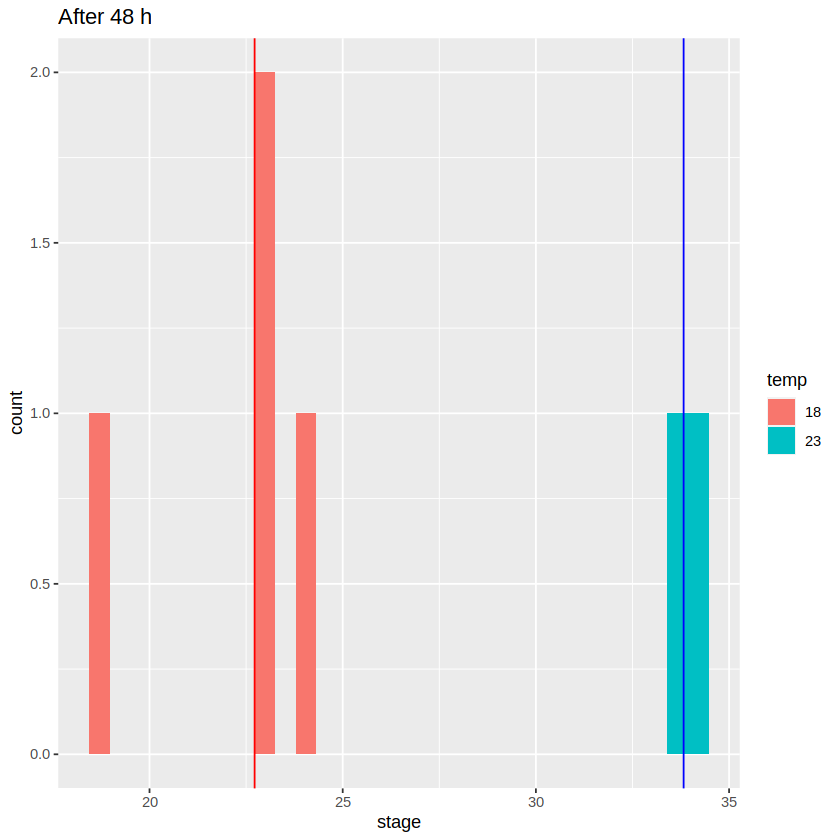

In [15]:
data48<-data|>filter(Time=='48')
ggplot(data48, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=22.72),color='red')+
geom_vline(aes(xintercept=33.82353), color='blue')+
ggtitle("After 48 h")

# 72 h

In [16]:
mean18<-33.5
mean23<-42
print("mean 18")
print(mean18)
print("mean 23")
print(mean23)

[1] "mean 18"
[1] 33.5
[1] "mean 23"
[1] 42


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


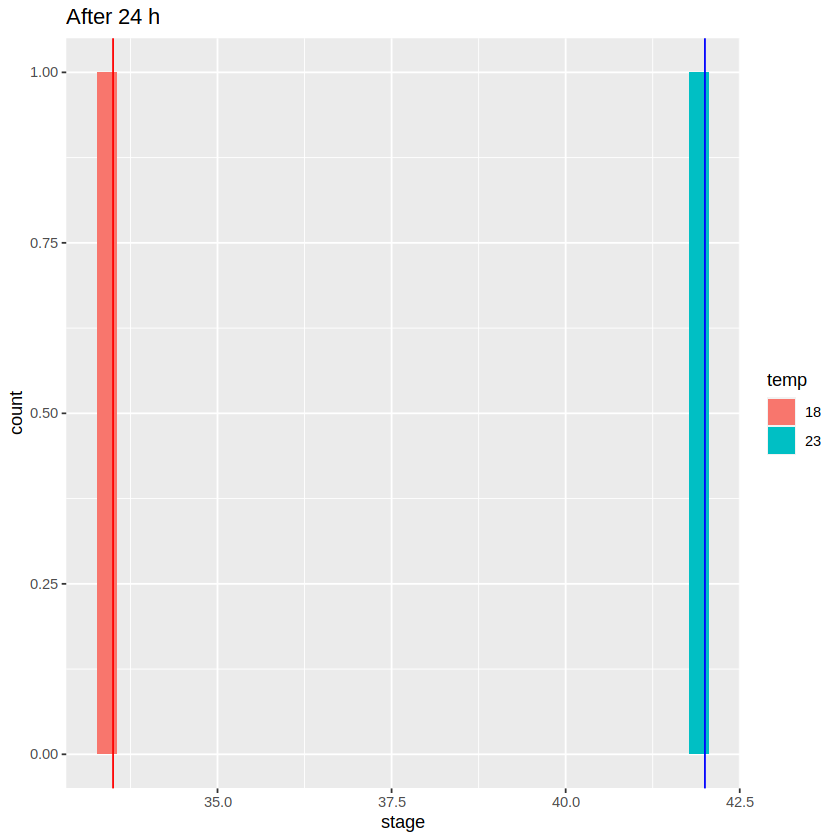

In [17]:
data72<-data|>filter(Time=='72')
ggplot(data72, aes(x=stage, count=embryos_percent,fill=temp))+
geom_histogram()+
geom_vline(aes(xintercept=33.5),color='red')+
geom_vline(aes(xintercept=42), color='blue')+
ggtitle("After 24 h")

# mean stage for temp

In [18]:
df3<-data.frame(
    "Time"=c('0','0',"24 h","24 h","48 h","48 h","72 h","72 h"),
    "time"=c(0,0,24,24,48,48,72,72),
    "mean"=c(0,0,12.05769,19.5,22.72,33.82353,33.5,42),
    "temp"=c('18','23', '18','23','18','23','18','23'),
    "rate"=c(0,0,12.05769/24,19.5/24,22.72/48,33.82353/48,33.5/72,42/72)
    )
df3

Time,time,mean,temp,rate
<chr>,<dbl>,<dbl>,<chr>,<dbl>
0,0,0.00000,18,0.0000000
0,0,0.00000,23,0.0000000
24 h,24,12.05769,18,0.5024037
⋮,⋮,⋮,⋮,⋮
48 h,48,33.82353,23,0.7046569
72 h,72,33.50000,18,0.4652778
72 h,72,42.00000,23,0.5833333


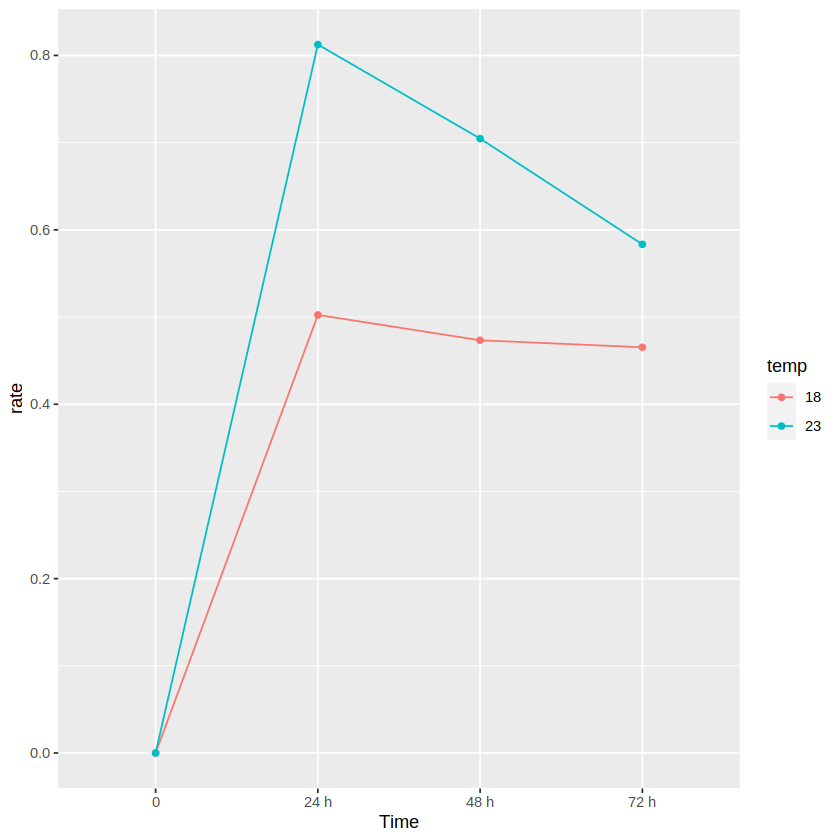

In [19]:
ggplot(df3, aes(x=Time, y=rate, group=temp, color=temp))+
geom_point()+
geom_line()




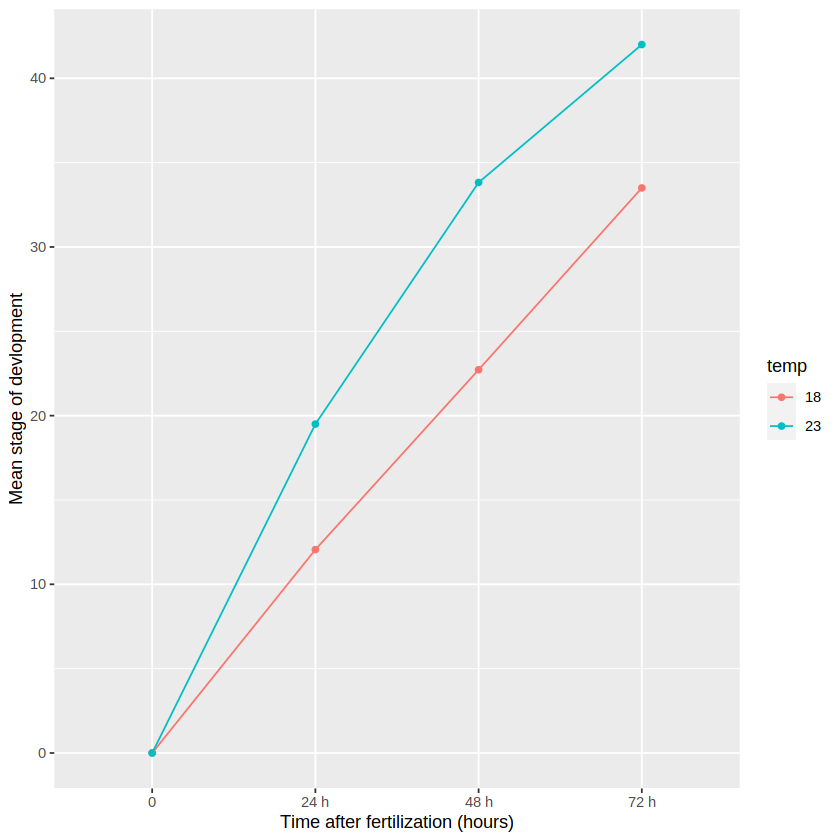

In [20]:
ggplot(df3, aes(x=Time, y=mean, group=temp, color=temp))+
geom_point()+
geom_line()+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment")

#lm<-lm(mean~Time,data=df3)


In [21]:

abc23<-abc|>filter(temp==23)
abc18<-abc|>filter(temp==18)
lmm18<-lm(stage~  time+0,data=abc18)
lmm23<-lm(stage~  time+0,data=abc23)

In [22]:
summary(lmm18)


Call:
lm(formula = stage ~ time + 0, data = abc18)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2786 -0.0491  0.5410  0.8607  1.2214 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
time 0.474555   0.004134   114.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.135 on 45 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9965 
F-statistic: 1.318e+04 on 1 and 45 DF,  p-value: < 2.2e-16


In [23]:
summary(lmm23)


Call:
lm(formula = stage ~ time + 0, data = abc23)

Residuals:
   Min     1Q Median     3Q    Max 
-6.291  1.306  1.806  3.403  3.403 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
time   0.6707     0.0124   54.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.51 on 39 degrees of freedom
Multiple R-squared:  0.9868,	Adjusted R-squared:  0.9865 
F-statistic:  2924 on 1 and 39 DF,  p-value: < 2.2e-16


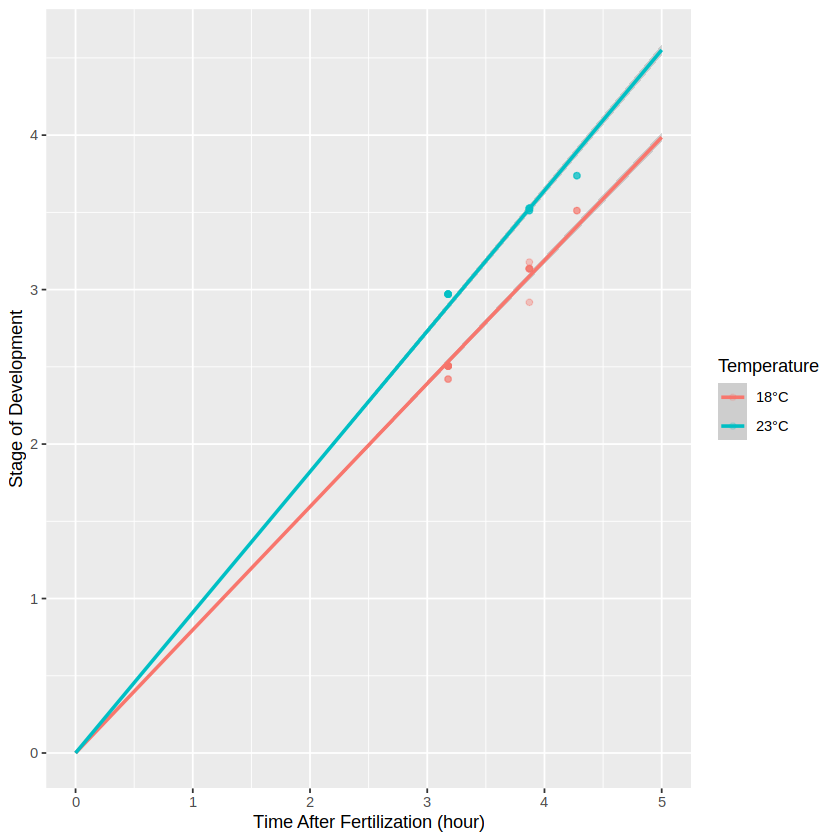

In [24]:
Figure1<-ggplot(abc, aes(x=log(time), y=log(stage), group=temp, color=temp))+
geom_smooth(formula=y~x+0,fullrange=TRUE,method='lm')+
labs(x="Time After Fertilization (hour)", y= 'Stage of Development', color='Temperature')+
scale_color_discrete(labels=c('18°C','23°C'))+

xlim(c(0,5))+
geom_point(alpha=0.2)#+
Figure1

In [25]:
abcd<-abc|>mutate(time=log(time),stage=log(stage))

temp,slope,Intercept
<fct>,<dbl>,<dbl>
18,0.4745547,NA
23,0.6707134,NA


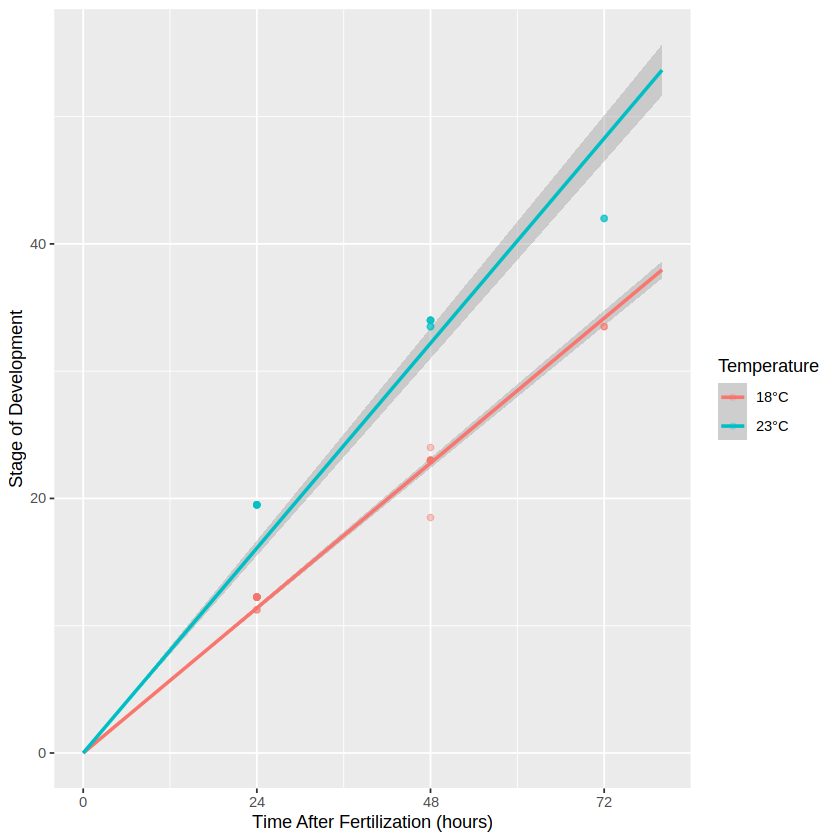

In [26]:
Figure1<-ggplot(abc, aes(x=time, y=stage, group=temp, color=temp))+
geom_smooth(formula=y~x+0,fullrange=TRUE,method='lm')+
labs(x="Time After Fertilization (hours)", y= 'Stage of Development', color='Temperature')+
scale_color_discrete(labels=c('18°C','23°C'))+
scale_x_continuous(limits=c(0,80),breaks=seq(0,80,24))+
geom_point(alpha=0.2)


Figure1
#geom_abline(intercept=0,slope=0.6707134)
#+
#annotate("text",label=(paste0("slope==",coef(lm(abc$y~abc$x))[2])),parse=TRUE)

abc|>group_by(temp)|>do({mod=lm(stage~time+0,data=.)
                        data.frame(slope=coef(mod)[1],
                                  Intercept=coef(mod)[4])
                        })

In [27]:

an<-lm(stage~time+0,data=abc)
summary(an)



Call:
lm(formula = stage ~ time + 0, data = abc)

Residuals:
   Min     1Q Median     3Q    Max 
-9.126 -2.563 -1.563  5.687  6.374 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
time   0.5755     0.0124   46.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.891 on 85 degrees of freedom
Multiple R-squared:  0.962,	Adjusted R-squared:  0.9616 
F-statistic:  2154 on 1 and 85 DF,  p-value: < 2.2e-16


In [28]:
abc2<-abclm|>filter(temp==23)
abc1<-abclm|>filter(temp==18)
lmm18<-lm(stage~time,data=abc1)
lmm23<-lm(stage~time,data=abc2)
abc23<-abc|>filter(temp==23)
abc18<-abc|>filter(temp==18)

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --   80

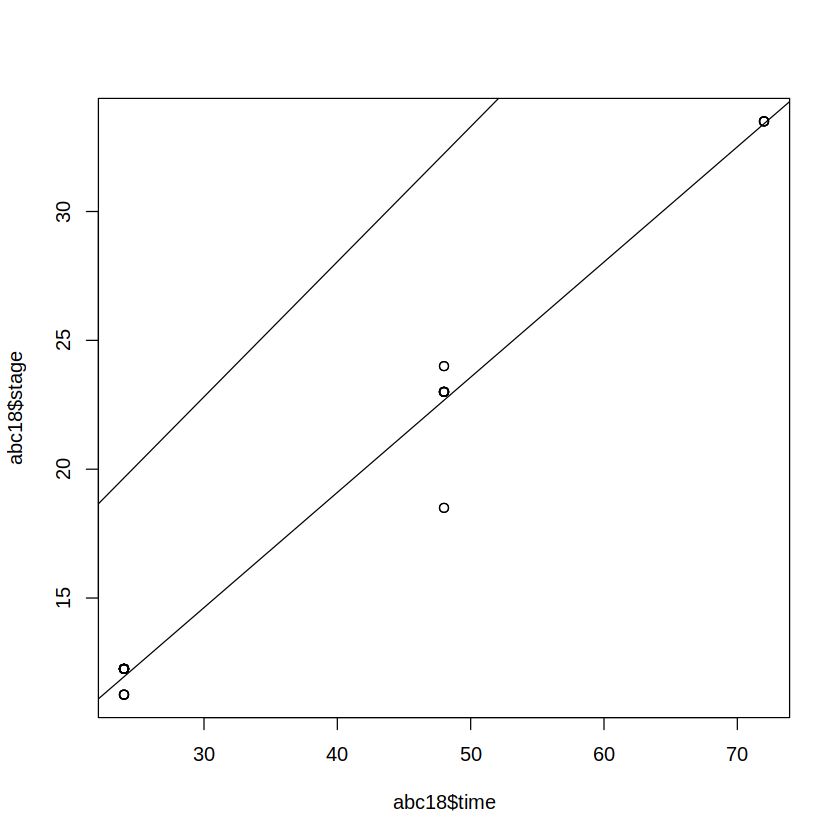

In [29]:
plot(abc18$time,abc18$stage)
abline(lmm18)
abline(lmm23)
xlim(c(0,80))


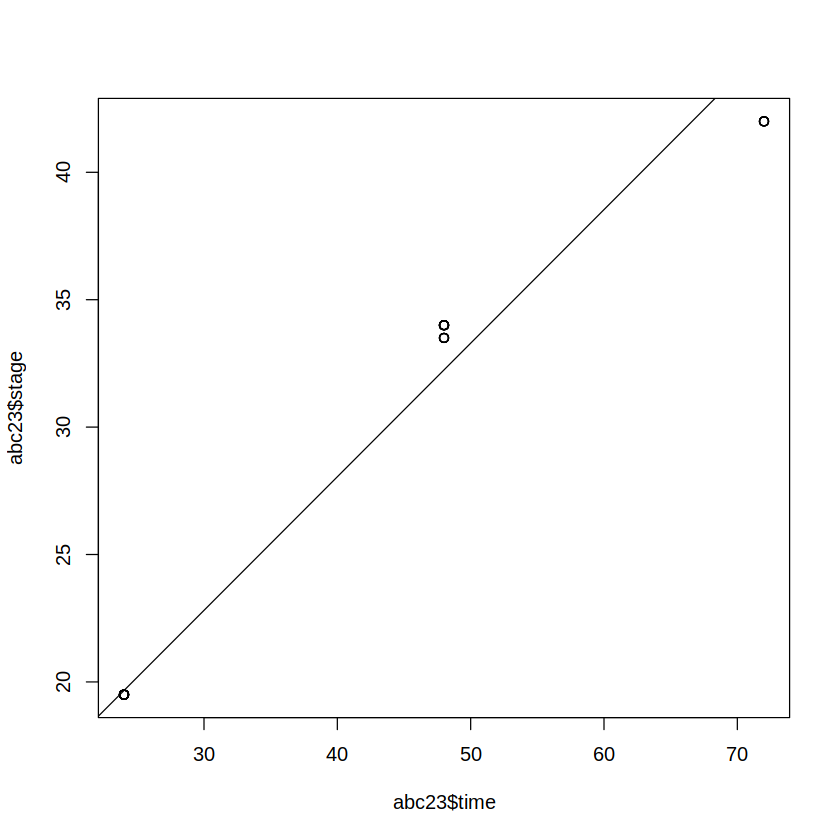

In [30]:


#ggplot(abc, aes(x=time,y=stage, color=temp))+
#geom_point()+

plot(abc23$time,abc23$stage)
abline(lmm23)

install.packages("vcdExtra")


library(vcdExtra)
dataa<- expand.dft(data,freq=embyos)
dataa

Warning message:
“Removed 26 rows containing non-finite values (`stat_boxplot()`).”


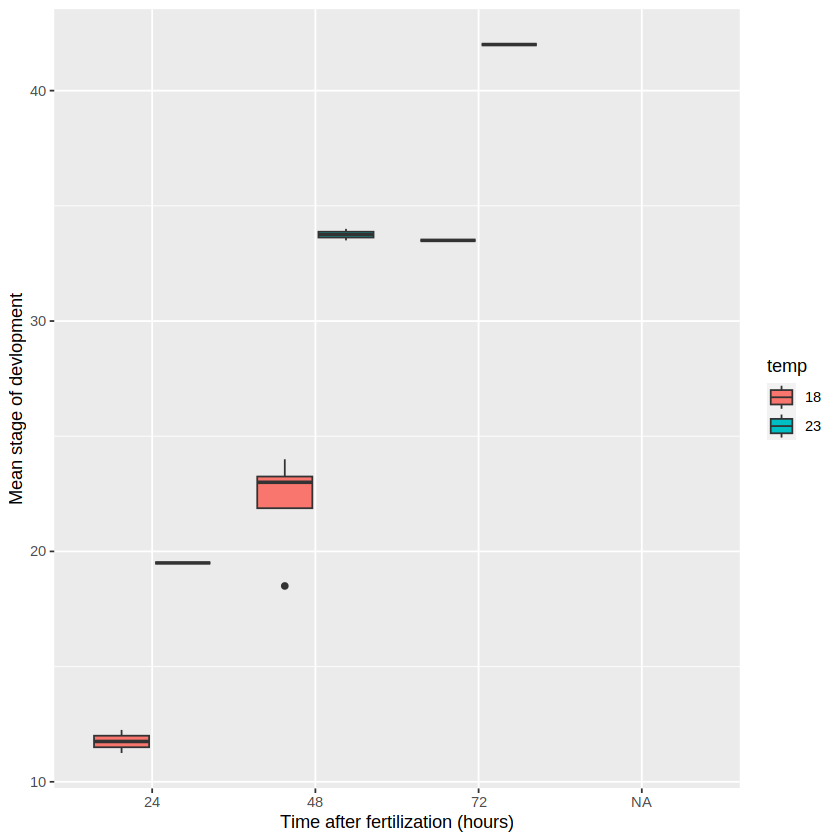

In [31]:
ggplot(data, aes(x=Time, y=stage, fill=temp))+
geom_boxplot()+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment")

ggplot(df3, aes(x=Time, y=rate, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment / Time after fertilization (hours)")# rate for days

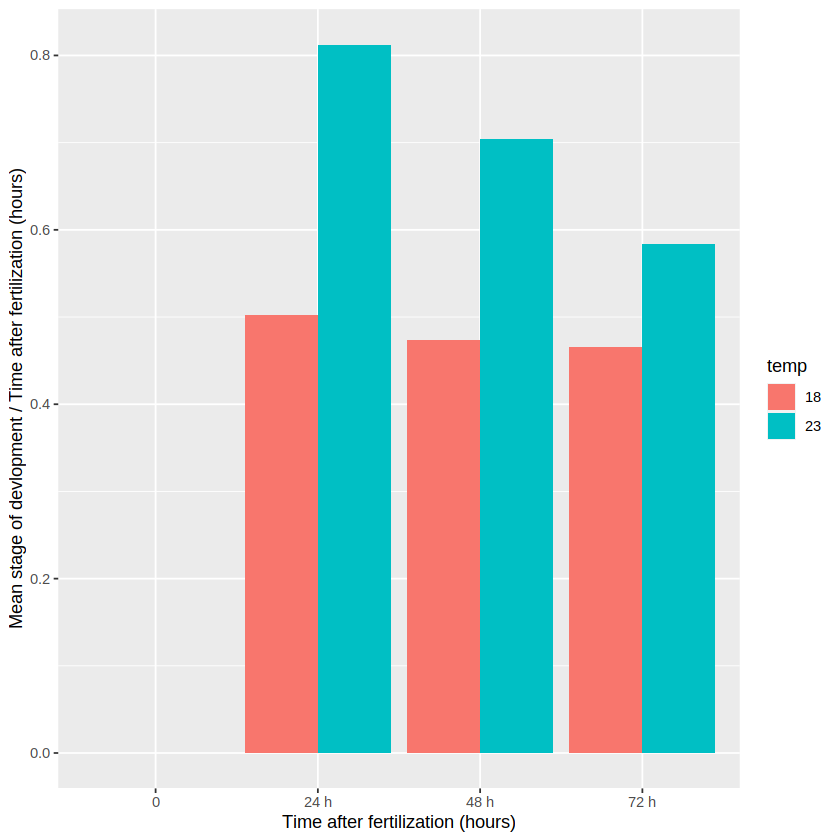

In [32]:
ggplot(df3, aes(x=Time, y=rate, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Mean stage of devlopment / Time after fertilization (hours)")

# rate for days based on each 24 h

In [33]:
22.72-12.05769

[1] 10.66231

Time,mean,temp,rate
<chr>,<dbl>,<chr>,<dbl>
24 h,12.05769,18,0.5024037
24 h,19.50000,23,0.8125000
48 h,22.72000,18,0.4442629
48 h,33.82353,23,0.5968137
72 h,33.50000,18,0.4491667
72 h,42.00000,23,0.3406863


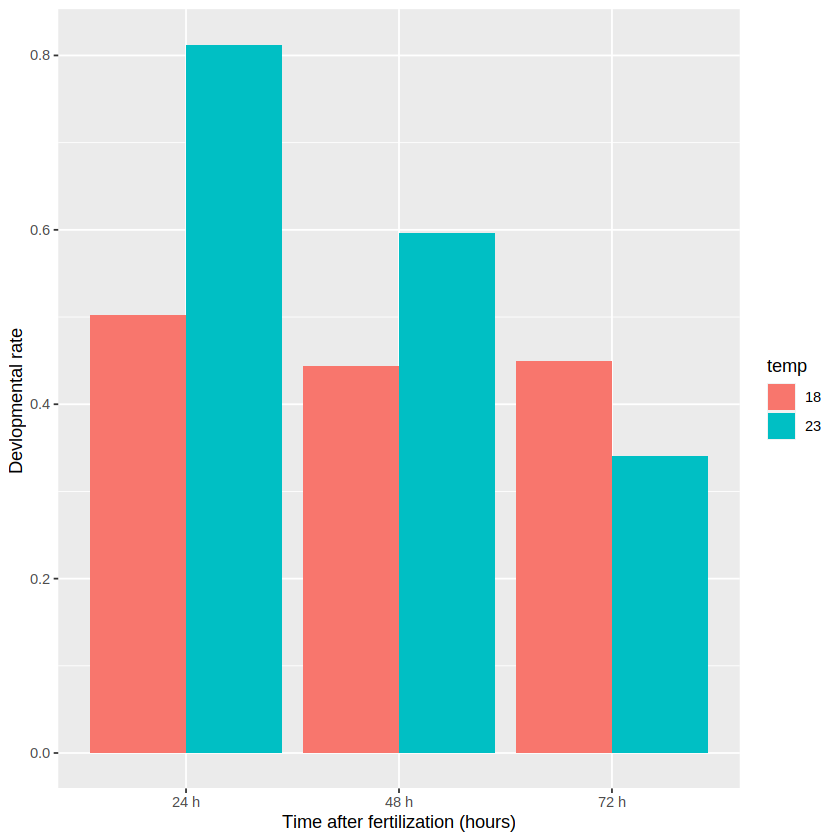

In [34]:
df3<-data.frame(
    "Time"=c("24 h","24 h","48 h","48 h","72 h","72 h"),
    "mean"=c(12.05769,19.5,22.72,33.82353,33.5,42),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24, 19.5/24, 
             (22.72-12.05769)/24,(33.82353-19.5)/24, 
             (33.5-22.72)/24, (42-33.82353)/24)
    )
df3


ggplot(df3, aes(x=Time, y=rate, fill=temp))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Time after fertilization (hours)", y="Devlopmental rate ")

In [35]:
dataa<-data|>select(Time,temp,embyos,stage)
dataa

Time,temp,embyos,stage
<fct>,<fct>,<dbl>,<dbl>
24,18,5,11.25
24,18,21,12.25
24,23,6,19.50
⋮,⋮,⋮,⋮
NA,NA,NA,NA
NA,NA,NA,NA
NA,NA,NA,NA


In [36]:
vec<-c(rep(11.25,5),rep(12.25,21))
vec2<-c(rep(19.5,17))
t.test(vec,vec2,paired=FALSE)
vec<-c(rep(23,5),rep(18.5,2),rep(23,6),rep(24,2))
vec2<-c(rep(33.5,6),rep(34,11))
t.test(vec,vec2,paired=FALSE)
vec<-c(33,34,33.5,33,34)
vec2<-c(42,42,41.9,42.1,42,42)
vec
vec2
t.test(vec,vec2,paired=FALSE)



	Welch Two Sample t-test

data:  vec and vec2
t = -94.418, df = 25, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.604646 -7.279969
sample estimates:
mean of x mean of y 
 12.05769  19.50000 



	Welch Two Sample t-test

data:  vec and vec2
t = -25.875, df = 14.535, p-value = 1.449e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -12.22283 -10.35756
sample estimates:
mean of x mean of y 
 22.53333  33.82353 


[1] 33.0 34.0 33.5 33.0 34.0

[1] 42.0 42.0 41.9 42.1 42.0 42.0


	Welch Two Sample t-test

data:  vec and vec2
t = -37.762, df = 4.1068, p-value = 2.239e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.1186 -7.8814
sample estimates:
mean of x mean of y 
     33.5      42.0 


In [37]:
vec<-c(rep(33.5,5))
vec2<-c(rep(42,6))
vec
vec2
t.test(vec,vec2,paired=FALSE)

[1] 33.5 33.5 33.5 33.5 33.5

[1] 42 42 42 42 42 42

ERROR: Error in t.test.default(vec, vec2, paired = FALSE): data are essentially constant


# average rates

temp,ave_rate
<chr>,<chr>
18,0.4652778
23,0.5833333


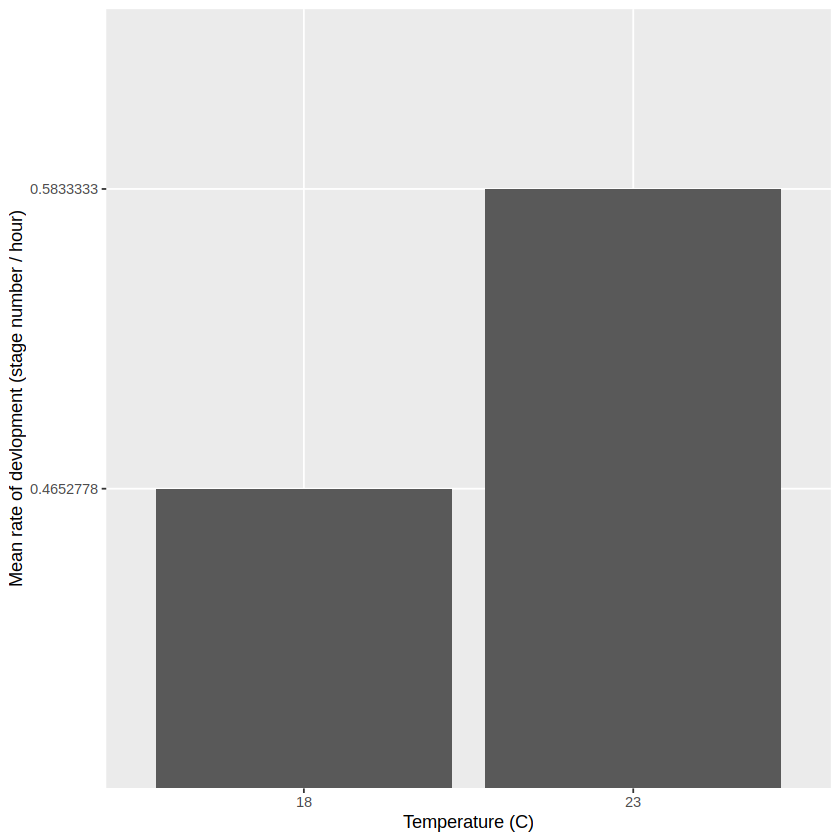

In [38]:
df18<-df3|>filter(temp=='18')|>group_by(temp)|>summarize(ave=mean(rate))
df23<-df3|>filter(temp=='23')|>group_by(temp)|>summarize(ave=mean(rate))

df4<-data.frame(
    "temp"=c('18','23'),
    "ave_rate"=c("0.4652778","0.5833333"))
df4
ggplot(df4, aes(x=temp, y=ave_rate))+
geom_bar(stat="identity", position = position_dodge())+
labs(x="Temperature (C)", y="Mean rate of devlopment (stage number / hour)")

the developmental stage was inverted to be numerical in a way that each stage number was assigned that number and a rate of develompent was calculated based on stage number/hours
due to low data avaiblable we had few datasince very low were alive more than 24h
therefore we lacked a full distribution whithin the stages so we couldnt find a good variance to compare the mean rates  via a t test.
a method 

# rate pattern paired t-test

In [39]:
set.seed(9999)

df4<-data.frame(
    "Time"=c(24,24,48,48,72,72),
    "temp"=c('18','23', '18','23','18','23'),
    "rate"=c(12.05769/24, 19.5/24, 
             (22.72-12.05769)/24,(33.82353-19.5)/24, 
             (33.5-22.72)/24, (42-33.82353)/24)
    )
df4.18<-df4|>filter(temp==18)
df4.23<-df4|>filter(temp==23)
sd18<-sd(df4.18$rate)
sd23<-sd(df4.23$rate)
mean18<-mean(df4.18$rate)
mean23<-mean(df4.23$rate)
df4.18$rate
df4.23$rate
sd18
sd23
mean18
mean23
test18<- c(rnorm(100),mean=0.465278,sd=0.0322453880593727)
test23<- c(rnorm(100),mean=0.583333,sd=0.236195564940148)

t.test(test18,test23,paired=FALSE)


[1] 0.5024037 0.4442629 0.4491667

[1] 0.8125000 0.5968137 0.3406863

[1] 0.03224539

[1] 0.2361956

[1] 0.4652778

[1] 0.5833333


	Welch Two Sample t-test

data:  test18 and test23
t = -0.03192, df = 199.73, p-value = 0.9746
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2741286  0.2653951
sample estimates:
 mean of x  mean of y 
0.03560344 0.03997020 


In [40]:
summary(lmm18)


Call:
lm(formula = stage ~ time, data = abc1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1765  0.0932  0.3038  0.3235  1.3235 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.215950   0.344224   3.532 0.000965 ***
time        0.447095   0.008591  52.042  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 45 degrees of freedom
Multiple R-squared:  0.9837,	Adjusted R-squared:  0.9833 
F-statistic:  2708 on 1 and 45 DF,  p-value: < 2.2e-16


In [41]:
summary(lmm23)


Call:
lm(formula = stage ~ time, data = abc2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0832 -0.1642 -0.1642  1.7548  1.7548 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.08316    0.73422   9.647 7.01e-12 ***
time         0.52421    0.01661  31.550  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.907 on 39 degrees of freedom
Multiple R-squared:  0.9623,	Adjusted R-squared:  0.9613 
F-statistic: 995.4 on 1 and 39 DF,  p-value: < 2.2e-16


In [42]:
ger<-data.frame(Temperature=c("18°C","23°C"),
              Rate=c(0.47455,0.67071))
ger

Temperature,Rate
<chr>,<dbl>
18°C,0.47455
23°C,0.67071


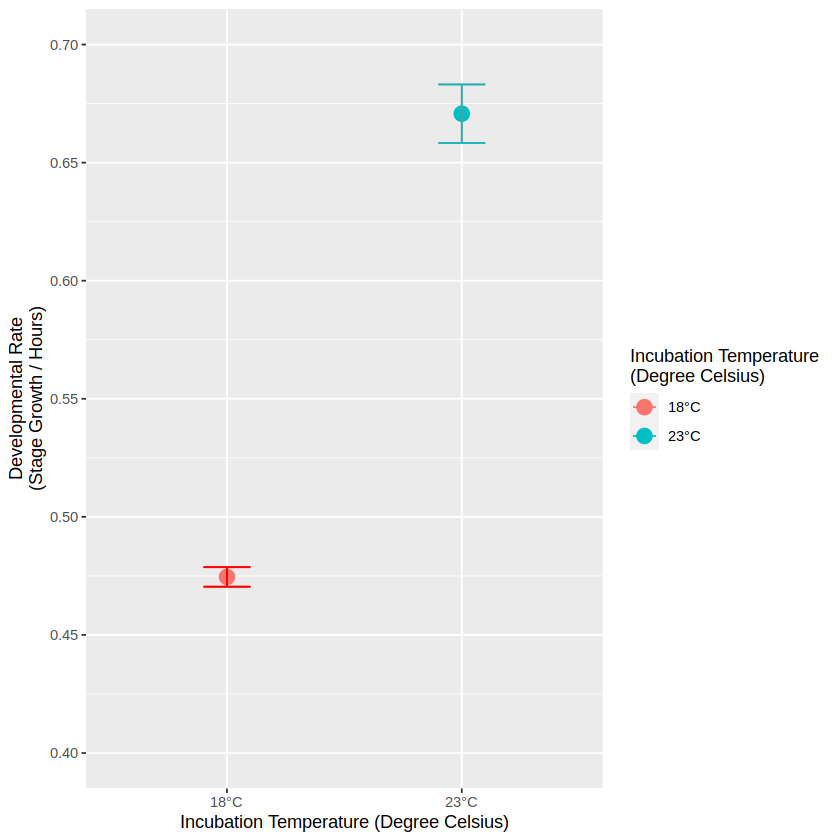

In [43]:
ggplot(ger,aes(x=Temperature,y=Rate,color=Temperature))+
geom_point(size=4)+
geom_errorbar(aes(x='18°C',ymin=0.47455-0.004134,ymax=0.47455+0.004134),width=0.2,color='red')+
geom_errorbar(aes(x='23°C',ymin=0.67071-0.0124,ymax=0.67071+0.0124),width=0.2)+
scale_y_continuous(limits=c(0.4,0.7),breaks=seq(0,1,0.05))+
labs(x='Incubation Temperature (Degree Celsius)',y='Developmental Rate\n(Stage Growth / Hours)',color='Incubation Temperature\n(Degree Celsius)')


temp,slope,Intercept
<fct>,<dbl>,<dbl>
18,0.4745547,NA
23,0.6707134,NA


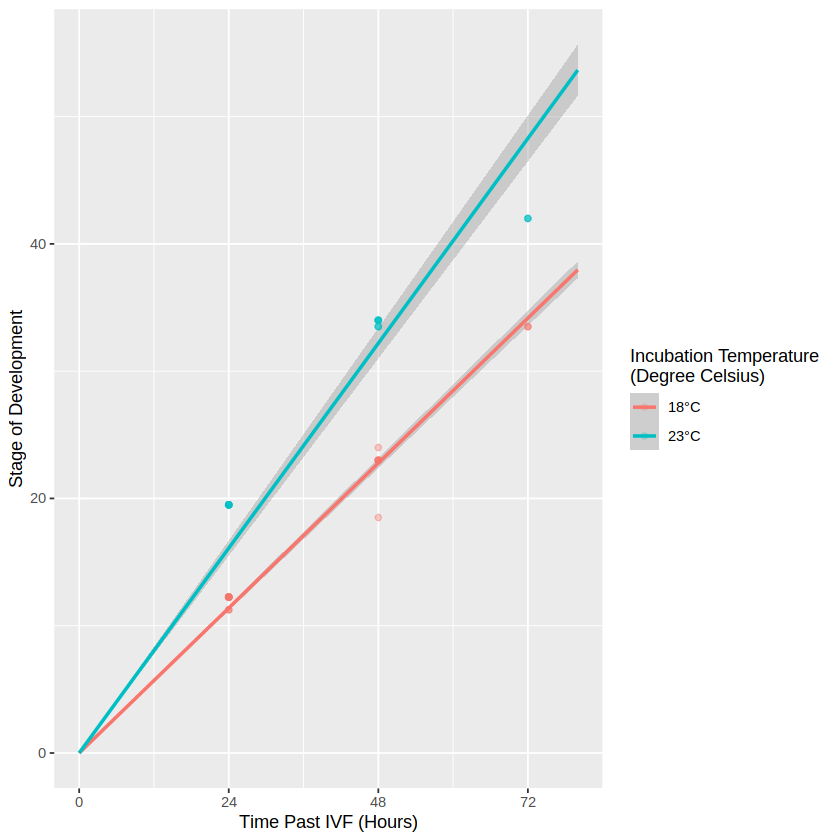

In [44]:
Figure1<-ggplot(abc, aes(x=time, y=stage, group=temp, color=temp))+
geom_smooth(formula=y~x+0,fullrange=TRUE,method='lm')+
labs(x="Time Past IVF (Hours)", y= 'Stage of Development', color='Incubation Temperature\n(Degree Celsius)')+
scale_color_discrete(labels=c('18°C','23°C'))+
scale_x_continuous(limits=c(0,80),breaks=seq(0,80,24))+
geom_point(alpha=0.2)

           

#lm_eqn <- function(abc){
    #m <- lm(stage~time+0, abc);
   # eq <- substitute(~~italic(r)^2~"="~r2,
  #       list(r2 = format(summary(m)$r.squared, digits = 3)))
 #   as.character(as.expression(eq));
#}



Figure1 #+ geom_text(x = 24, y = 50, label = lm_eqn(abc), parse = TRUE)


gg<-abc|>group_by(temp)|>do({mod=lm(stage~time+0,data=.)
                        data.frame(slope=coef(mod)[1],
                                  Intercept=coef(mod)[2])
                        })
gg
#text(0.7, 25, paste("R-squared =", round(rsq(gg), 2)))

In [48]:
library(ggbreak)
library(patchwork)
df3<-data.frame(
    "Temperature"=c("18C","23C","18C","23C"),
    "percent"=c(571/597,543/560,26/597,17/560),
    "Stat"=c('Dead','Dead', 'Alive','Alive')
    )
df3



Temperature,percent,Stat
<chr>,<dbl>,<chr>
18C,0.95644891,Dead
23C,0.96964286,Dead
18C,0.04355109,Alive
23C,0.03035714,Alive


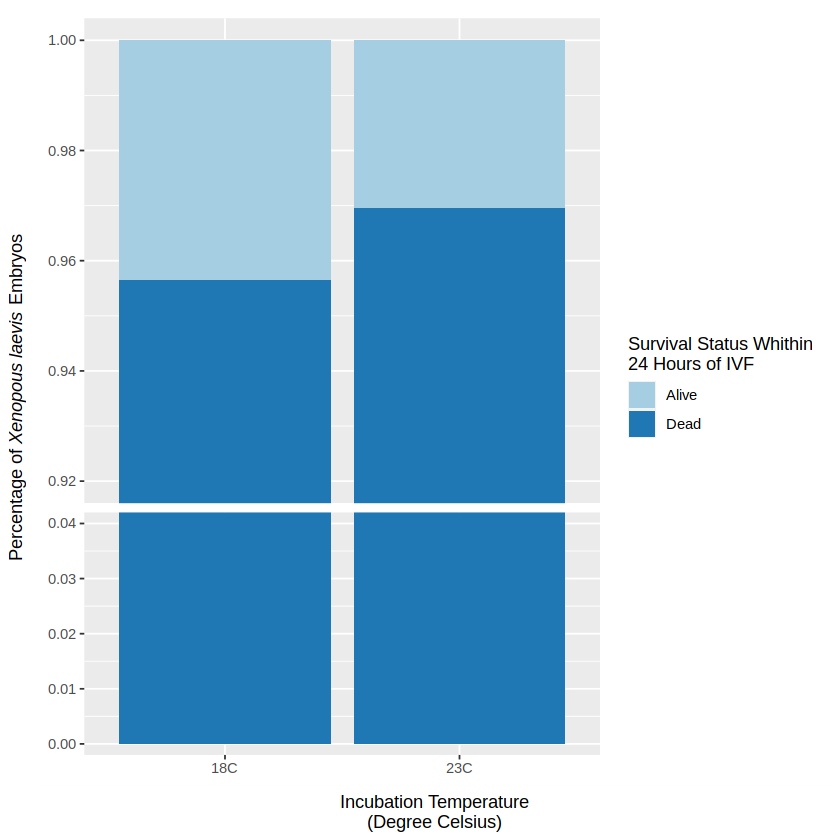

In [49]:
ggplot(df3, aes(x=Temperature, y=percent, fill=Stat))+
geom_bar(stat="identity"  )+#, position = position_dodge())+
scale_y_break(c(0.04,0.92))+
#scale_y_continuous(limits=c(0,1),breaks=seq(0,1,0.01))+
#geom_text(aes( label=percent), vjust=1.6, 
      #      color="white", size=3.5)+
scale_fill_brewer(palette="Paired")+
labs(x='Incubation Temperature\n(Degree Celsius)',y=expression(paste('Percentage of ',italic('Xenopous laevis'),' Embryos')),
     fill='Survival Status Whithin\n24 Hours of IVF')

#scale_color_discrete(labels=c('18°C','23°C'))+
#scale_x_continuous(limits=c(0,80),breaks=seq(0,80,24))

In [50]:
df<-data.frame(
    "Temprature"=c("18C","23C"),
    "Lost"=c(571,543),
    "Alive"=c(26,17)
    )
modifiedDf<-as.matrix(df)
modifiedDf

datatable <- matrix(c(571,543,26,17),nrow=2,ncol=2)
#datatable
chisq.test(datatable,correct=FALSE)

Temprature,Lost,Alive
18C,571,26
23C,543,17



	Pearson's Chi-squared test

data:  datatable
X-squared = 1.4057, df = 1, p-value = 0.2358


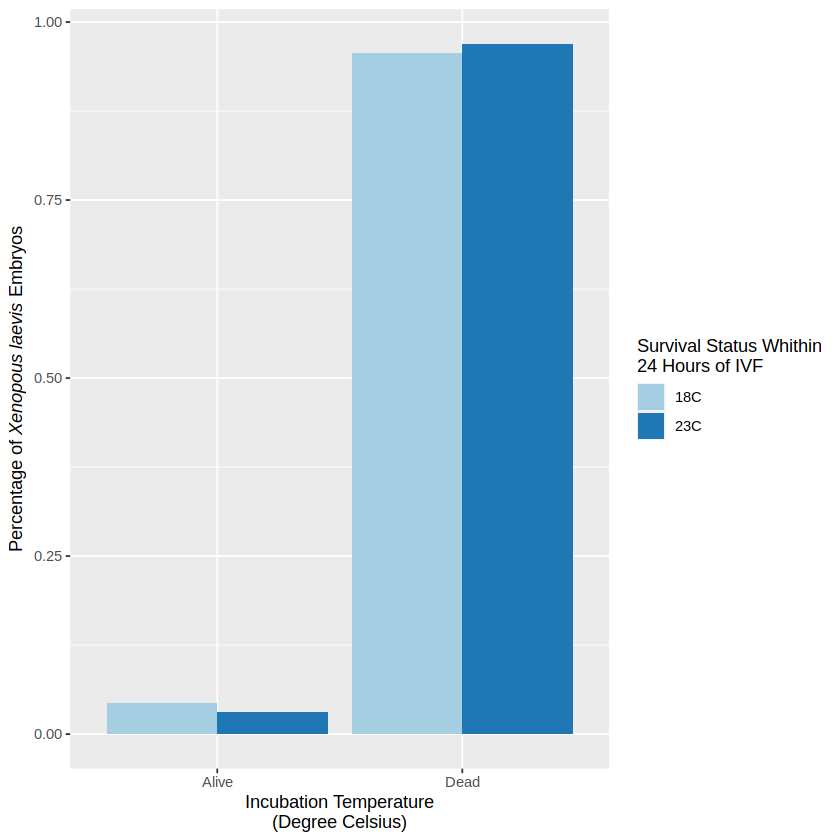

In [51]:
ggplot(df3, aes(x=Stat, y=percent, fill=Temperature))+
geom_bar(stat="identity"  , position = position_dodge())+
#scale_y_break(c(0.04,0.92))+
#scale_y_continuous(limits=c(0,1),breaks=seq(0,1,0.01))+
#geom_text(aes( label=percent), vjust=1.6, 
      #      color="white", size=3.5)+
scale_fill_brewer(palette="Paired")+
labs(x='Incubation Temperature\n(Degree Celsius)',y=expression(paste('Percentage of ',italic('Xenopous laevis'),' Embryos')),
     fill='Survival Status Whithin\n24 Hours of IVF')

